# Working with EMODnet Chemistry products

This [Jupyter notebook](src/EMODNET-chemistry.ipynb) illustrates the use of an EMODnet Chemistry product using [OPeNDAP](https://www.opendap.org/). To run this example, it is necessary to install the following (free) software packages:

* Julia available from https://julialang.org/downloads/. The code is tested with the version 1.0 of Julia.
* Some Julia packages ([NCDatasets](https://github.com/Alexander-Barth/NCDatasets.jl), [PyPlot](https://github.com/JuliaPy/PyPlot.jl) and [IJulia](https://github.com/JuliaLang/IJulia.jl)), which can be installed with these commands once you started Julia:

```julia
Pkg.add("NCDatasets.jl")
Pkg.add("PyPlot")
Pkg.add("IJulia")
```

The first step is to load some julia packages

In [35]:
using NCDatasets
using PyPlot
using PyCall

We define some helper functions to plot the datasets

In [36]:
using PyCall: PyObject
PyObject(x::Adjoint) = PyObject(copy(x))
function PyObject(a::Array{Union{T,Missing},N}) where {T,N}
  numpy_ma = pyimport("numpy")["ma"]
  pycall(numpy_ma["array"], Any, coalesce.(a,zero(T)), mask=ismissing.(a))
end

PyObject

The command `Dataset` (from the package `NCDatasets`) allows one to open a OPeNDAP URL and shows all metadata.

In [37]:
Phnc = Dataset("http://ec.oceanbrowser.net:8081/data/emodnet-domains/Baltic%20Sea/Autumn%20(September-November)%20-%206-years%20running%20averages/Water_body_phosphate.4Danl.nc")

Dataset: http://ec.oceanbrowser.net:8081/data/emodnet-domains/Baltic%20Sea/Autumn%20(September-November)%20-%206-years%20running%20averages/Water_body_phosphate.4Danl.nc
Group: /

Dimensions
   depth = 21
   idlen = 46
   lat = 130
   lon = 216
   maxStrlen64 = 64
   nv = 2
   observations = 459636
   time = 32

Variables
  lon   (216)
    Datatype:    Float32
    Dimensions:  lon
    Attributes:
     units                = degrees_east

  lat   (130)
    Datatype:    Float32
    Dimensions:  lat
    Attributes:
     units                = degrees_north

  depth   (21)
    Datatype:    Float32
    Dimensions:  depth
    Attributes:
     positive             = down
     units                = meters

  time   (32)
    Datatype:    Float32
    Dimensions:  time
    Attributes:
     climatology          = climatology_bounds
     units                = Days since 1980-01-01

  nv   (2)
    Datatype:    Int32
    Dimensions:  nv

  observations   (459636)
    Datatype:    Int32
    Dimensio

From the Dataset `Phnc` we load the variables "lon", "lat" and "time". The final `[:]` means that we load all the elements of a variable.

In [38]:
Phlon = Phnc["lon"][:];
Phlat = Phnc["lat"][:];
Phtime = Phnc["time"][:];

While `Phlon` and `Phlat` are just a list of numbers, `Phtime` is a list of `DateTime` objects. The year and month (for example) can be extracted with the functions `Dates.year` and `Dates.month`:

In [39]:
Dates.year(Phtime[1])

1983

In [40]:
Dates.month(Phtime[1])

10

## Making plots

Let's plot the surface phosphate concentration for the year 2000.

We need to determine the index of the year 2000:

In [41]:
n = findfirst(Dates.year.(Phtime) .== 2000)

18

Load the corresponding data:

In [42]:
phosphate = Phnc["Water_body_phosphate"][:,:,end,n];

Make the plot

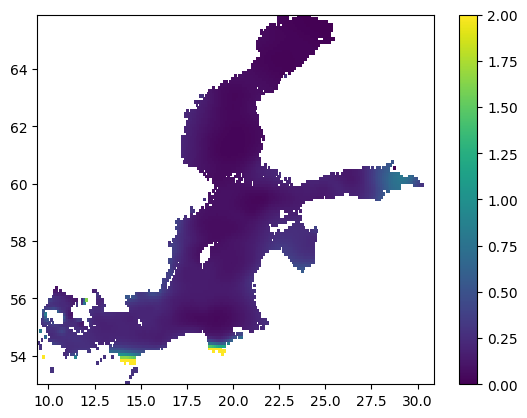

In [43]:
pcolor(Phlon,Phlat,phosphate');colorbar(); clim(0,2)

In [44]:
Nnc = Dataset("http://ec.oceanbrowser.net:8081/data/emodnet-domains/Baltic%20Sea/Autumn%20(September-November)%20-%206-years%20running%20averages/Water_body_silicate.4Danl.nc")

Dataset: http://ec.oceanbrowser.net:8081/data/emodnet-domains/Baltic%20Sea/Autumn%20(September-November)%20-%206-years%20running%20averages/Water_body_silicate.4Danl.nc
Group: /

Dimensions
   depth = 21
   idlen = 46
   lat = 130
   lon = 216
   maxStrlen64 = 64
   nv = 2
   observations = 399453
   time = 32

Variables
  lon   (216)
    Datatype:    Float32
    Dimensions:  lon
    Attributes:
     units                = degrees_east

  lat   (130)
    Datatype:    Float32
    Dimensions:  lat
    Attributes:
     units                = degrees_north

  depth   (21)
    Datatype:    Float32
    Dimensions:  depth
    Attributes:
     positive             = down
     units                = meters

  time   (32)
    Datatype:    Float32
    Dimensions:  time
    Attributes:
     climatology          = climatology_bounds
     units                = Days since 1980-01-01

  nv   (2)
    Datatype:    Int32
    Dimensions:  nv

  observations   (399453)
    Datatype:    Int32
    Dimension

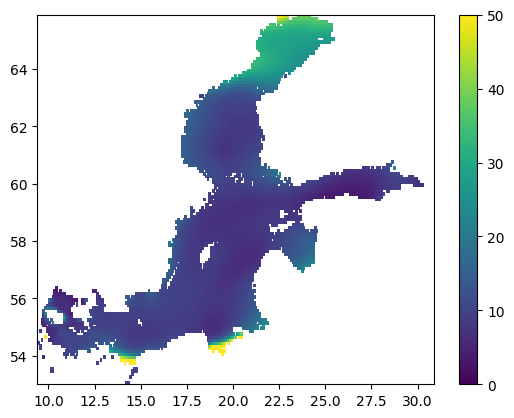

In [45]:
Nlon = Nnc["lon"][:];
Nlat = Nnc["lat"][:];
Ntime = Nnc["time"][:];
n = findall(Dates.year.(Ntime) .== 2000)[1]
silicate = Nnc["Water_body_silicate"][:,:,end,n];

pcolor(Nlon,Nlat,silicate');colorbar(); clim(0,50)

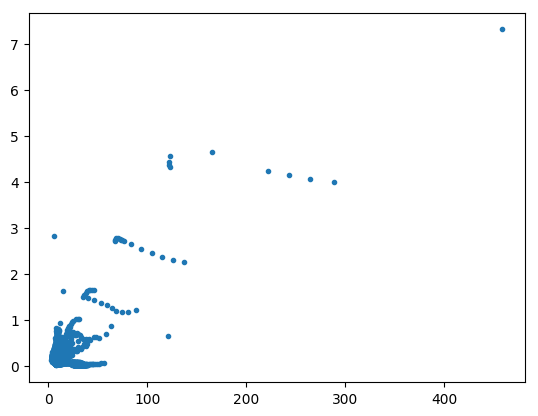

In [46]:
size(silicate[:])
size(phosphate[:])

valid = .!ismissing.(silicate[:]) .& .!ismissing.(phosphate[:])

plot(silicate[valid],phosphate[valid],".");